# 5

Solution with N=10 interior points (h=0.0909):
------------------------------------------------------------
         x       Numerical Exact (Analytically)           Error
------------------------------------------------------------
  1   0.090909    -2.623746776465    -6.506324103911    3.882577e+00
  2   0.181818    -0.901436328743    -4.526957447873    3.625521e+00
  3   0.272727    -0.033766063743    -3.313234299113    3.279468e+00
  4   0.363636    -0.418302883068    -3.221321525363    2.803019e+00
  5   0.454545    -0.988570764100    -3.295798987377    2.307228e+00
  6   0.545455    -0.460942503637    -2.386708078286    1.925766e+00
  7   0.636364     1.164581898323    -0.494048798090    1.658631e+00
  8   0.727273     2.604375238575     1.232220246342    1.372155e+00
  9   0.818182     2.791961494503     1.836678915763    9.552826e-01
 10   0.909091     2.124907567708     1.675494077907    4.494135e-01

Maximum error compared to N=10000 reference: 4.196089e+00


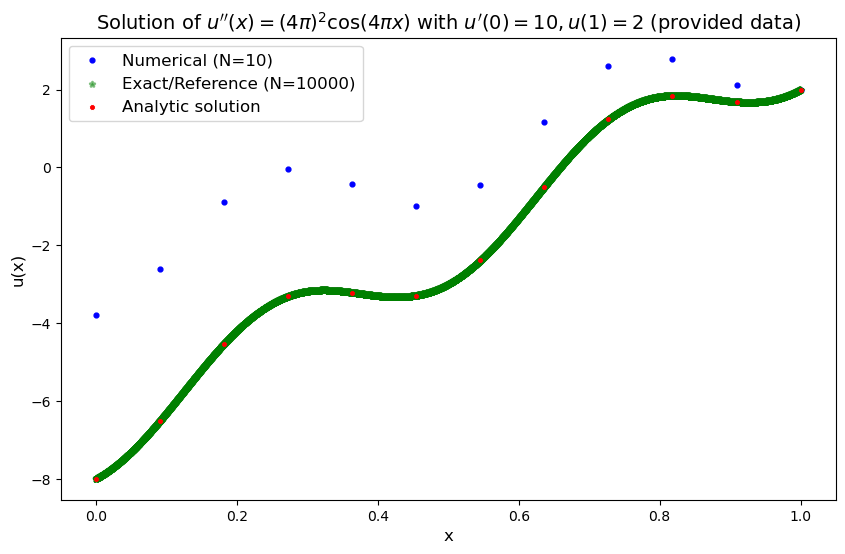

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np


def solve_bvp(N=10, fd_order=2):
    L = 1.0
    h = L / (N + 1)
    x = np.linspace(0, 1, N + 2)

    f = lambda x: (4*np.pi)**2 * np.cos(4*np.pi*x)

    u = np.zeros(N + 2)

    u[-1] = 2

    A = np.zeros((N+1, N+1))
    b = np.zeros(N+1)

    for i in range(N+1):
        A[i, i] = -2.0
        if i > 0:
            A[i, i-1] = 1.0
        if i < N:
            A[i, i+1] = 1.0

        b[i] = h**2 * f(x[i])
    if fd_order == 2:
        b0  = 20*h
        A[0,0] = -3
        A[0,1] = 4
        A[0,2]=-1
    elif fd_order == 1:
        b0 = 10*h
        A[0,0] = -1
        A[0,1] = 1

    # Inject boundary conditions
    b[0]  = b0
    b[-1] -= u[-1]

    u[0:-1] = np.linalg.solve(A, b)
    
    return x, u


def exact_solution(x):
    """
    Exact solution to u''(x) = (4π)² cos(4πx) with u'(0)=1, u(1)=2
    u'= 4π sin(4πx) + A
    The general solution is: u(x) = -cos(4πx) + Ax + B
    Applying boundary conditions:
    u'(0) = 0 + A = 10 → A = 10
    u(1) = -cos(4π) + 10 + B = -1 + 10 + B = 9+ B = 2 → B = -7
    
    So exact solution: u(x) = -cos(4πx) + 1x + 2
    """
    return -np.cos(4*np.pi*x) + 10*x - 7

def main(N=10, analytic=True, print_results=True, plot=True, size = None, fd_order=2):
    # Solve with N=10
     
    # N = 10
    x, u_numerical = solve_bvp(N, fd_order = fd_order)
    
    # Calculate exact solution
    u_exact = exact_solution(x)
    
    # Print results
    if print_results:
        print(f"Solution with N={N} interior points (h={1/(N+1):.4f}):")
        print("-" * 60)
        print(f"{'x':>10} {'Numerical':>15} {'Exact (Analytically)':>15} {'Error':>15}")
        print("-" * 60)
        for i in range(1, N+1):  # i from 1 to 10
            error = abs(u_numerical[i] - u_exact[i])
            print(f"{i:3d} {x[i]:10.6f} {u_numerical[i]:18.12f} {u_exact[i]:18.12f} {error:15.6e}")
        print("=" * 60)
    

    try:
        # Load reference solution (N=10000)
        ref_data = np.loadtxt('solutionB_N10000.dat')
        if ref_data is not None:
            x_ref = ref_data[:, 0]
            u_ref = ref_data[:, 1]
            
            # Interpolate reference solution to our grid
            from scipy.interpolate import interp1d
            interp_func = interp1d(x_ref, u_ref, kind='linear')
            u_ref_interp = interp_func(x)
            
            # Calculate error compared to reference
            error_ref = np.max(np.abs(u_numerical - u_ref_interp))
            print(f"\nMaximum error compared to N=10000 reference: {error_ref:.6e}")
                # Plot results
            if plot:
                plt.figure(figsize=(10, 6))
                assert x.shape == u_numerical.shape, "x and u_numerical must have the same shape"
                if size:
                    ms = size
                else:
                    ms = 12
                plt.scatter(x, u_numerical, marker='o', color='b', s=ms, label=f'Numerical (N={N})')

                plt.scatter(x_ref, u_ref, marker='*', color='g', s=12, alpha = .5, label='Exact/Reference (N=10000)', linewidth=2)
                if analytic:
                    plt.scatter(x, u_exact, marker='x', color='r', s=6, label='Analytic solution', linewidth=2)
                    
                plt.xlabel('x', fontsize=12)
                plt.ylabel('u(x)', fontsize=12)
                plt.title('Solution of $u\'\'(x) = (4\\pi)^2 \\cos(4\\pi x)$ with $u\'(0)=10, u(1)=2$ (provided data)', fontsize=14)
                plt.legend(fontsize=12)

    except:
        print("\nNote: Reference file 'solutionA_N10000.dat' not found for comparison.")
        print("Using exact solution for validation instead.")

        for i in range(len(x)):
            error = abs(u_numerical[i] - u_exact[i])
            print(f"{x[i]:10.4f} {u_numerical[i]:15.6f} {u_exact[i]:15.6f} {error:15.6f}")
        
        # Calculate and print maximum error
        max_error = np.max(np.abs(u_numerical - u_exact))
        print("\n" + "=" * 60)
        print(f"Maximum error: {max_error:.6e}")
        print("=" * 60)
        
        # Plot results
        plt.figure(figsize=(10, 6))
        plt.scatter(x, u_numerical, 'bo-', label=f'Numerical (N={N})', markersize=6)
        plt.plot(x, u_exact, 'r-', label='Exact Analytic Solution', linewidth=2)
        plt.xlabel('x', fontsize=12)
        plt.ylabel('u(x)', fontsize=12)
        plt.title('Solution of $u\'\'(x) = (4\\pi)^2 \\cos(4\\pi x)$ with $u\'\(0)=10, u(1)=2$ (analytical solution)', fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    return x, u_numerical, u_ref, u_exact
        

if __name__ == "__main__":
    main(N=10)

For confirmation that the numerical approximation converges to the true solution/the provided data, we can refine the mesh then compute the errors:x, 


Maximum error compared to N=10000 reference: 7.204568e-03


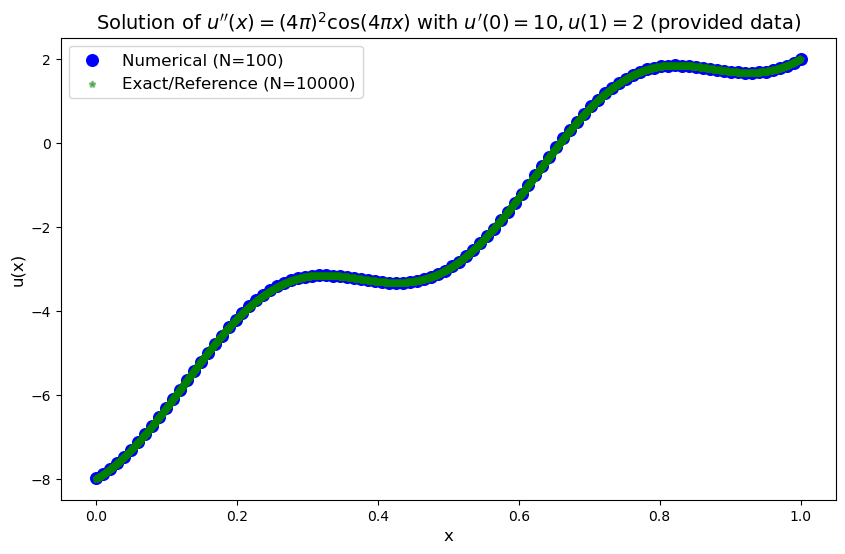

In [31]:
x, u_numerical, u_ref, u_exact = main(100, analytic=False, print_results=False, size = 70)

# 6


     N            h      E (Frobenius)         e (scaled)

Maximum error compared to N=10000 reference: 1.973921e+01
     5 1.666667e-01      2.553305e+01       5.106610e+00

Maximum error compared to N=10000 reference: 4.196089e+00
    10 9.090909e-02      7.849262e+00       7.849262e-01

Maximum error compared to N=10000 reference: 6.533160e-01
    20 4.761905e-02      1.795448e+00       8.977241e-02

Maximum error compared to N=10000 reference: 8.974813e-02
    40 2.439024e-02      3.726019e-01       9.315047e-03

Maximum error compared to N=10000 reference: 1.301626e-02
    80 1.234568e-02      7.762972e-02       9.703715e-04

Maximum error compared to N=10000 reference: 2.149269e-03
   160 6.211180e-03      1.740160e-02       1.087600e-04

Maximum error compared to N=10000 reference: 3.974418e-04
   320 3.115265e-03      4.397576e-03       1.374242e-05

Maximum error compared to N=10000 reference: 8.179131e-05
   640 1.560062e-03      1.257535e-03       1.964899e-06

Maximum error

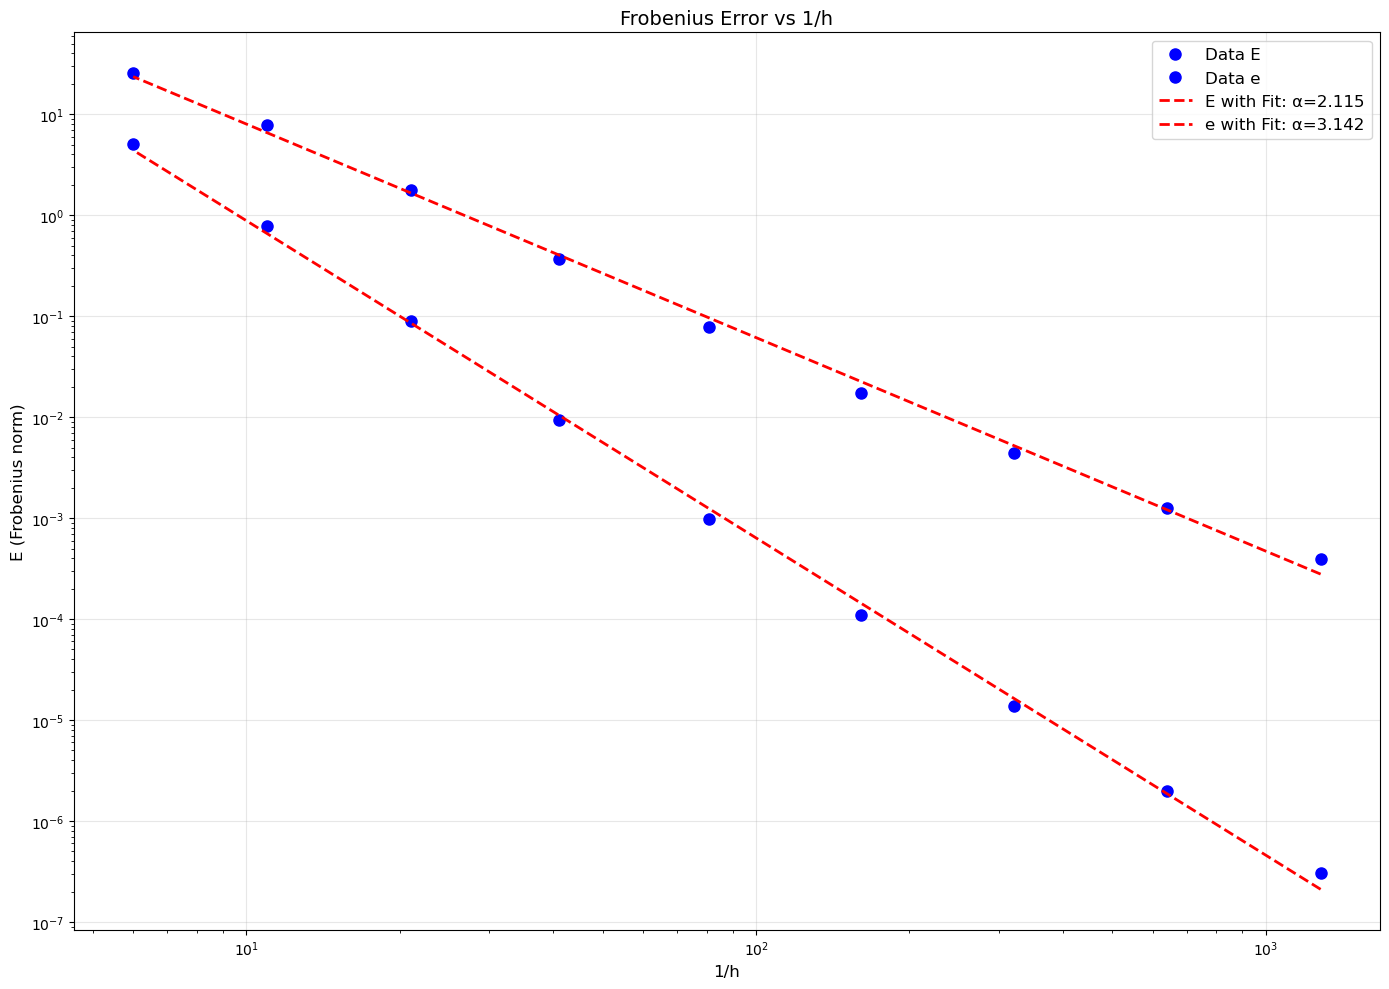


CONVERGENCE RATE ANALYSIS:
Frobenius norm (E): α = 2.1152)
Scaled norm (e):    α = 3.1425


In [32]:
from scipy.interpolate import CubicSpline
from scipy.optimize import curve_fit
import warnings; warnings.filterwarnings('ignore')

def fit_and_plot_convergence(fd_order=2):
    L = 1.
    E = lambda u_num, u_ref: np.linalg.norm(u_num - u_ref)
    e = lambda u_num, u_ref: np.linalg.norm(u_num - u_ref) / len(u_num)
    N_values = [5, 10, 20, 40, 80, 160, 320, 640, 1280]
    results = {
        'N': [],
        'h': [],
        'E': [],
        'e': [],
    }
        
    print(f"{'N':>6} {'h':>12} {'E (Frobenius)':>18} {'e (scaled)':>18}")

    for N in N_values:
        x, u_numerical, u_ref, u_exact = main(N, analytic=False, print_results=False, plot=False, fd_order=fd_order)
        x_ref = np.linspace(0, 1, 10000 + 2)
        uinterior_ref = CubicSpline( x_ref, u_ref)(x[1:-1])

        Error, error, = E(u_numerical[1:-1], uinterior_ref), e(u_numerical[1:-1], uinterior_ref)
        h = L / (N + 1)

        results['N'].append(N)
        results['h'].append(h)
        results['E'].append(Error)
        results['e'].append(error)
        print(f"{N:6d} {h:12.6e}"
                f"{Error:18.6e} {error:18.6e}")

    print("=" * 80)

    for key in results:
        results[key] = np.array(results[key])

    log_h = np.log(results['h'])
    log_E = np.log(results['E'])
    log_e = np.log(results['e'])



    # For E (Frobenius norm)
    coeffs_E = np.polyfit(log_h, log_E, 1)
    α_E = coeffs_E[0]
    C_E = np.exp(coeffs_E[1])

    # For e (scaled Frobenius norm)
    coeffs_e = np.polyfit(log_h, log_e, 1)
    α_e = coeffs_e[0]
    C_e = np.exp(coeffs_e[1])

    print(f"E (Frobenius) fit: E = {C_E:.6f} * h^{α_E:.4f}")
    print(f"e (scaled) fit:    e = {C_e:.6f} * h^{α_e:.4f}")


    # Create log-log plot
    fig, ax = plt.subplots(figsize=(14, 10))

    ax.loglog(1/results['h'], results['E'], 'bo', linewidth=2, markersize=8, label='Data E')
    ax.loglog(1/results['h'], results['e'], 'bo', linewidth=2, markersize=8, label='Data e')

    # Plot fitted curve
    h_fit = np.logspace(np.log10(min(results['h'])), np.log10(max(results['h'])), 100)
    E_fit = C_E * (h_fit**α_E)
    ax.loglog(1/h_fit, E_fit, 'r--', linewidth=2, label=f'E with Fit: α={α_E:.3f}')

    e_fit = C_e * (h_fit**α_e)
    ax.loglog(1/h_fit, e_fit, 'r--', linewidth=2, label=f'e with Fit: α={α_e:.3f}')

    ax.set_xlabel('1/h', fontsize=12)
    ax.set_ylabel('E (Frobenius norm)', fontsize=12)
    ax.set_title('Frobenius Error vs 1/h', fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=12)


    plt.tight_layout()
    plt.savefig('error_convergence.png', dpi=150, bbox_inches='tight')
    plt.show()

    # Print convergence rates
    print("\n" + "=" * 80)
    print("CONVERGENCE RATE ANALYSIS:")
    print("=" * 80)
    print(f"Frobenius norm (E): α = {α_E:.4f})")
    print(f"Scaled norm (e):    α = {α_e:.4f}")
    return results, E_fit, e_fit, α_E, α_e
results_2, E_fit_2, e_fit_2, α_E2, α_e2= fit_and_plot_convergence(fd_order=2)

     N            h      E (Frobenius)         e (scaled)

Maximum error compared to N=10000 reference: 1.315947e+01
     5 1.666667e-01      1.740636e+01       3.481271e+00

Maximum error compared to N=10000 reference: 7.177894e+00
    10 9.090909e-02      1.316567e+01       1.316567e+00

Maximum error compared to N=10000 reference: 3.759849e+00
    20 4.761905e-02      9.717364e+00       4.858682e-01

Maximum error compared to N=10000 reference: 1.925776e+00
    40 2.439024e-02      7.033490e+00       1.758373e-01

Maximum error compared to N=10000 reference: 9.747757e-01
    80 1.234568e-02      5.033981e+00       6.292476e-02

Maximum error compared to N=10000 reference: 4.904151e-01
   160 6.211180e-03      3.581529e+00       2.238456e-02

Maximum error compared to N=10000 reference: 2.459714e-01
   320 3.115265e-03      2.540388e+00       7.938712e-03

Maximum error compared to N=10000 reference: 1.231776e-01
   640 1.560062e-03      1.799122e+00       2.811129e-03

Maximum error

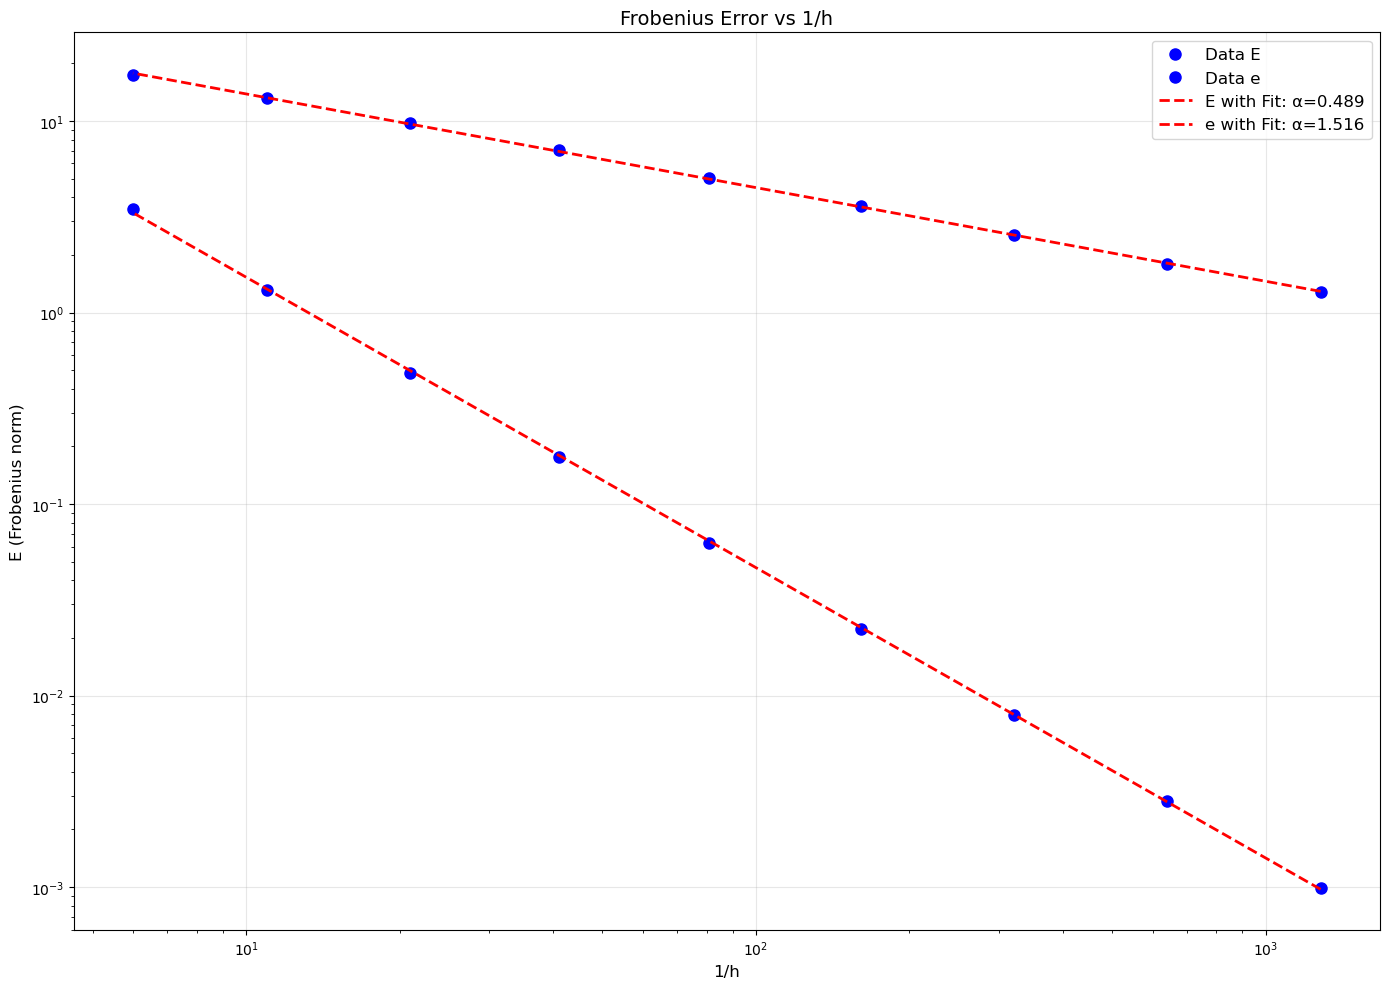


CONVERGENCE RATE ANALYSIS:
Frobenius norm (E): α = 0.4891)
Scaled norm (e):    α = 1.5164


In [33]:
results_1, E_fit_1, e_fit_1, α_E1, α_e1 = fit_and_plot_convergence(fd_order=1)

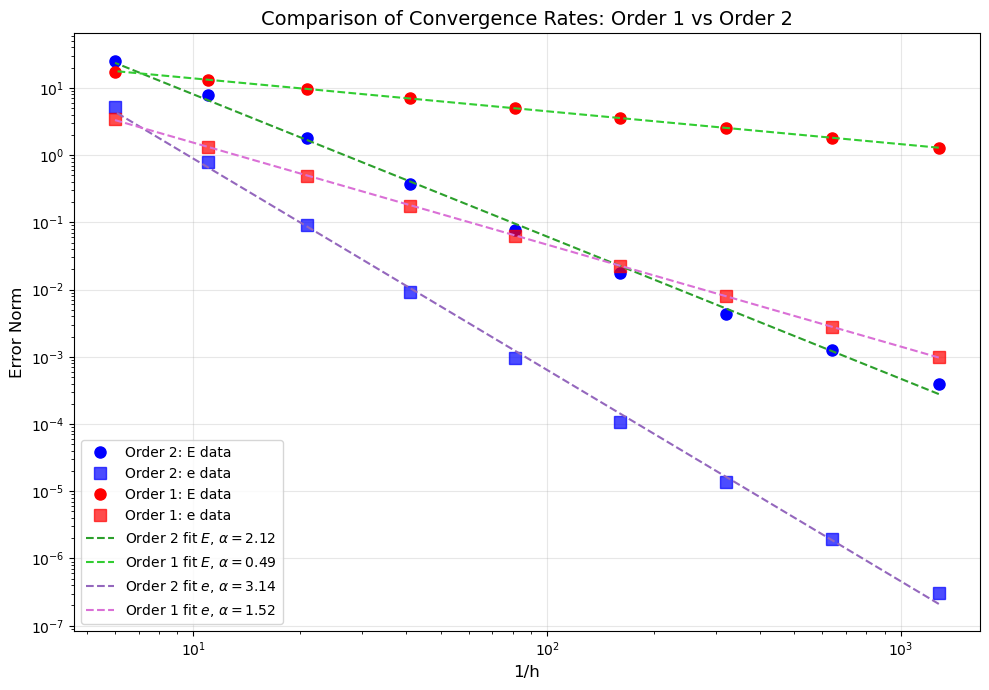

In [39]:
fig, ax = plt.subplots(figsize=(10, 7))

# Plot order 2 results
ax.loglog(1/results_2['h'], results_2['E'], 'bo', linewidth=2, markersize=8, 
          label='Order 2: E data')
ax.loglog(1/results_2['h'], results_2['e'], 'bs', linewidth=2, markersize=8, 
          label='Order 2: e data', alpha=0.7)

# Plot order 1 results
ax.loglog(1/results_1['h'], results_1['E'], 'ro', linewidth=2, markersize=8, 
          label='Order 1: E data')
ax.loglog(1/results_1['h'], results_1['e'], 'rs', linewidth=2, markersize=8, 
          label='Order 1: e data', alpha=0.7)

h_fit = np.logspace(np.log10(min(results_1['h'])), np.log10(max(results_1['h'])), 100)
ax.loglog(1/h_fit, E_fit_2, color='tab:green', linestyle='--', linewidth=1.5,
        label=rf'Order 2 fit $E$, $\alpha={α_E2:.2f}$')

ax.loglog(1/h_fit, E_fit_1, color='limegreen', linestyle='--', linewidth=1.5,
        label=rf'Order 1 fit $E$, $\alpha={α_E1:.2f}$')

ax.loglog(1/h_fit, e_fit_2, color='tab:purple', linestyle='--', linewidth=1.5,
        label=rf'Order 2 fit $e$, $\alpha={α_e2:.2f}$')

ax.loglog(1/h_fit, e_fit_1, color='orchid', linestyle='--', linewidth=1.5,
        label=rf'Order 1 fit $e$, $\alpha={α_e1:.2f}$')

ax.set_xlabel('1/h', fontsize=12)
ax.set_ylabel('Error Norm', fontsize=12)
ax.set_title('Comparison of Convergence Rates: Order 1 vs Order 2', fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()

Using a second-order one-sided finite difference approximation for the derivative at $x = 0$ the fitted convergence rates were
$$
\alpha_E \approx 2.12, \qquad \alpha_e \approx 3.14.
$$

The observed convergence rate for $E$ is consistent with second-order accuracy, indicating that the overall discretization error is dominated by the interior second-order finite difference scheme together with the second-order boundary treatment. The error $e$ converges at a significantly higher rate because it includes an additional factor proportional to the mesh size $h$. Specifically, since
$$
e = \frac{E}{N}
$$
and
$$
N \sim \frac{1}{h},
$$
it follows that
$$
e \sim h E.
$$
Consequently, $e$ is expected to converge one order faster than $E$, which is consistent with the observed convergence rate of approximately $3$.

Next, the second-order one-sided derivative at $x = 0$
was replaced with a first-order forward difference approximation. In this case, the fitted convergence rates were
$$
\alpha_E \approx 0.49, \qquad \alpha_e \approx 1.52.
$$

The reduction in the convergence rate for $E$ indicates that the global accuracy of the numerical solution is now limited by the first-order boundary discretization. Since the error introduced at the boundary propagates throughout the computational domain, the overall convergence rate drops to approximately first order. The corresponding error $e$ again converges at roughly one order higher than $E$, consistent with its definition and scaling.

These results demonstrate that the global convergence rate of the numerical solution is strongly influenced by the accuracy of the boundary discretization. When a second-order one-sided derivative is used at $x = 0$ the method achieves second-order accuracy in the error $E$. However, when the boundary condition is approximated using a first-order scheme, the overall convergence rate is reduced accordingly. In both cases, the error measure $e$ converges at a higher rate than $E$ due to its additional scaling by the mesh size $h$. This highlights the importance of employing consistent high-order boundary treatments when designing finite difference schemes for boundary value problems.
